In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load dataset
df = pd.read_csv('anonymisedData/studentAssessment.csv')
df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


## EDA

In [5]:
#information dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [6]:
# null values 
df.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [7]:
# unique values banked 
df['is_banked'].nunique()

2

In [20]:
# gropuby banked 
groupby_banked = df.groupby('is_banked')['score'].count().reset_index()
groupby_banked

,is_banked,score
0,0,171831
1,1,1908


In [23]:
# check min and max values score
min = df['score'].min()
max = df['score'].max()

print('min values : ', min)
print('max values : ', max)

min values :  0.0
max values :  100.0


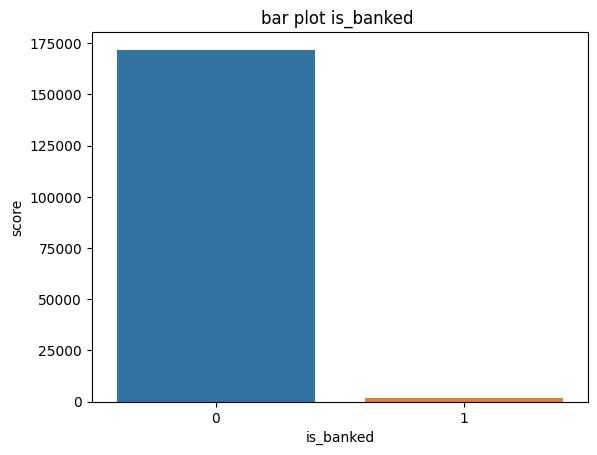

In [27]:
# visulatization is_banked and score

#create bar plot
sns.barplot(x='is_banked', y='score', data=groupby_banked)

#create label 
plt.xlabel('is_banked')
plt.ylabel('score')
plt.title('bar plot is_banked ')

#show plot
plt.show()

In [29]:
# describe score 
df['score'].describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

## Pre-Processing

In [32]:
df.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [33]:
# karena terdapat null values pada kolom score, maka kita imputasi dengan nilai 0
df['score'] = (np.where(df.score=='?', 0, df.score)).astype(int)

In [34]:
#cek ulang duplikasi data
df.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64